#**Estructurando un Proyecto de DS (parte III)**

### **Introducción a los dataset:**

> Cuento con 3 datasets que tienen una relación con varias llaves primarias. Los Datasets muestran el rendimiento en ventas en diferentes mercados de varios videojuegos, así como los reviews en Vandal (sitio especializado en videojuegos), y las ventas de cada consola.


### **Motivación:**

> En la industria de los videojuegos, el éxito de un nuevo lanzamiento puede ser determinante para el crecimiento y la rentabilidad de una empresa de desarrollo. Con la creciente competencia y la evolución constante de la tecnología, es esencial tomar decisiones informadas sobre qué tipo de videojuego desarrollar y en qué plataforma lanzarlo. Por lo tanto, surge la necesidad de analizar y predecir la posible performance de la salida de un nuevo videojuego en un mercado específico.
> El objetivo de este análisis es proporcionar a las empresas desarrolladoras de videojuegos una herramienta que les permita evaluar el potencial de éxito de sus futuros lanzamientos antes de invertir recursos significativos en su desarrollo. Al comprender mejor las variables que influyen en las ventas de videojuegos, las empresas pueden tomar decisiones estratégicas más acertadas y maximizar su retorno de inversión.

### **Audiencia:**

> La audiencia objetivo de este análisis son los **gerentes y tomadores de decisiones** en las empresas desarrolladoras de videojuegos. Esto incluye a los ejecutivos de nivel gerencial y estratégico, así como a los directores de marketing y desarrollo de productos. Estos profesionales son responsables de definir la estrategia de lanzamiento, incluyendo la selección de la plataforma de juego, el género del juego, la inversión en marketing y otros aspectos clave.
>Al proporcionar a esta audiencia una herramienta que les permita tomar decisiones más fundamentadas y respaldadas por datos, estamos contribuyendo a la capacidad de la industria de los videojuegos para adaptarse a un mercado en constante evolución y aumentar sus posibilidades de éxito en un entorno altamente competitivo.

In [1]:
import pandas as pd
from scipy import stats
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as sm
import os
from bokeh.resources import INLINE
import bokeh.io
from bokeh import *
bokeh.io.output_notebook(INLINE)

#**Carga y descripción de Datasets**
##Primer dataframe de la serie: **games**

In [2]:
from google.colab import drive

games = pd.read_excel('/content/drive/MyDrive/Colab Notebooks/Datasets/vgsales_cln.xlsx')
games.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Mario Kart Wii,Wii,2008,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
2,3,Wii Sports Resort,Wii,2009,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
3,4,New Super Mario Bros. Wii,Wii,2009,Platform,Nintendo,14.59,7.06,4.70,2.26,28.62
4,5,Wii Play,Wii,2006,Misc,Nintendo,14.03,9.20,2.93,2.85,29.02


In [3]:
# Princiapl información del dataset
print('Estructura de dataFrame:', games.shape)
games.info()

Estructura de dataFrame: (3768, 11)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3768 entries, 0 to 3767
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          3768 non-null   int64  
 1   Name          3768 non-null   object 
 2   Platform      3768 non-null   object 
 3   Year          3768 non-null   int64  
 4   Genre         3768 non-null   object 
 5   Publisher     3768 non-null   object 
 6   NA_Sales      3768 non-null   float64
 7   EU_Sales      3768 non-null   float64
 8   JP_Sales      3768 non-null   float64
 9   Other_Sales   3768 non-null   float64
 10  Global_Sales  3768 non-null   float64
dtypes: float64(5), int64(2), object(4)
memory usage: 323.9+ KB


In [4]:
# Describimos el dataset
games.describe()

,Rank,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
count,3768.000000,3768.000000,3768.000000,3768.000000,3768.000000,3768.000000,3768.000000
mean,1884.500000,2008.532113,0.472710,0.310332,0.089196,0.106038,0.978426
std,1087.872235,4.792706,1.209768,0.860273,0.343464,0.346039,2.483122
min,1.000000,1981.000000,0.000000,0.000000,0.000000,0.000000,0.010000
25%,942.750000,2005.000000,0.050000,0.020000,0.000000,0.010000,0.130000
50%,1884.500000,2009.000000,0.160000,0.090000,0.000000,0.030000,0.370000
75%,2826.250000,2012.000000,0.450000,0.290000,0.040000,0.090000,0.940000
max,3768.000000,2016.000000,41.490000,29.020000,6.500000,10.570000,82.740000


##Segundo dataframe de la serie: **consoles**

In [5]:
consoles = pd.read_excel('/content/drive/MyDrive/Colab Notebooks/Datasets/cgsales_clean.xlsx')
consoles.head()

,Platform_detail,Platform,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,PlayStation 2,PS2,53.65,55.28,23.18,26.59,158.70
1,Nintendo DS,DS,57.92,51.84,32.99,11.28,154.02
2,Nintendo Switch,NS,44.60,31.56,28.71,19.04,123.91
3,Game Boy,GB,43.18,40.05,32.47,2.99,118.69
4,PlayStation 4,PS4,38.14,45.83,9.61,23.43,117.02


In [6]:
# Princiapl información del dataset
print('Estructura de dataFrame:', consoles.shape)
consoles.info()

Estructura de dataFrame: (83, 7)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 83 entries, 0 to 82
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Platform_detail  83 non-null     object 
 1   Platform         83 non-null     object 
 2   NA_Sales         83 non-null     float64
 3   EU_Sales         83 non-null     float64
 4   JP_Sales         83 non-null     float64
 5   Other_Sales      83 non-null     float64
 6   Global_Sales     83 non-null     float64
dtypes: float64(5), object(2)
memory usage: 4.7+ KB


In [7]:
# Describimos el dataset
consoles.describe()

,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
count,83.000000,83.000000,83.000000,83.000000,83.000000
mean,8.711566,6.112771,3.969398,2.364337,21.540241
std,15.479677,12.685399,7.996044,5.368374,38.964424
min,0.000000,0.000000,0.000000,0.000000,0.010000
25%,0.000000,0.000000,0.000000,0.000000,0.165000
50%,0.000000,0.000000,0.030000,0.000000,1.500000
75%,12.000000,5.090000,3.285000,0.965000,21.545000
max,57.920000,55.280000,32.990000,26.590000,158.700000


##Tercer dataframe de la serie: **vandal**

In [8]:
vandal = pd.read_excel('/content/drive/MyDrive/Colab Notebooks/Datasets/vandal_coment_clean.xlsx')
vandal.head()

,Game_ID,Game,Platform_detail,Platform,website_rating,user_rating,release,year,developer,classification,preview,url
0,007Racing_PS,007 Racing,PlayStation,PS,6.9,4.88,2001-01-01,2001,EA Games & Electronic Arts,NaN,"Bond, James BondCon la reciente tirada de titu...",NaN
1,007:QuantumofSolace_X360,007: Quantum of Solace,Xbox 360,X360,7.1,6.58,2008-11-07,2008,Activision,PEGI +16,James Bond nunca ha dejado de estar presente e...,https://vandal.elespanol.com/analisis/x360/007...
2,007:QuantumofSolace_PS3,007: Quantum of Solace,PlayStation 3,PS3,7.1,6.97,2008-11-07,2008,Activision,PEGI +16,James Bond nunca ha dejado de estar presente e...,https://vandal.elespanol.com/analisis/x360/007...
3,007:QuantumofSolace_Wii,007: Quantum of Solace,Nintendo Wii,Wii,0.0,7.50,2008-11-07,2008,Activision,PEGI +16,James Bond nunca ha dejado de estar presente e...,https://vandal.elespanol.com/analisis/x360/007...
4,300:MarchtoGlory_PSP,300: March to Glory,PlayStation Portable,PSP,6.5,7.24,2007-03-30,2007,Collision Studios & Warner Bros.,PEGI +18,"Sin duda, uno de los estrenos de cine mas espe...",https://vandal.elespanol.com/analisis/psp/300-...


In [9]:
# Princiapl información del dataset
print('Estructura de dataFrame:', vandal.shape)
vandal.info()

Estructura de dataFrame: (3998, 12)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3998 entries, 0 to 3997
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Game_ID          3998 non-null   object        
 1   Game             3998 non-null   object        
 2   Platform_detail  3998 non-null   object        
 3   Platform         3998 non-null   object        
 4   website_rating   3998 non-null   float64       
 5   user_rating      3998 non-null   float64       
 6   release          3998 non-null   datetime64[ns]
 7   year             3998 non-null   int64         
 8   developer        3998 non-null   object        
 9   classification   3112 non-null   object        
 10  preview          3997 non-null   object        
 11  url              3673 non-null   object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(8)
memory usage: 374.9+ KB


In [10]:
# Describimos el dataset
vandal.describe()

,website_rating,user_rating,year
count,3998.000000,3998.000000,3998.000000
mean,6.548337,7.210955,2009.298149
std,3.146234,2.105616,4.544738
min,0.000000,0.000000,1995.000000
25%,6.200000,6.840000,2006.000000
50%,7.800000,7.700000,2009.000000
75%,8.600000,8.370000,2013.000000
max,10.000000,10.000000,2019.000000


In [11]:
#Nos encontramos con datos nulos, indicados con 0. En este dataset el valor 0 en 'website_rating' y 'user_rating', indica que no existe valoración para ese título
num_missing_vandal = (vandal[['Game_ID',	'Game',	'Platform_detail',	'Platform', 'website_rating',	'user_rating',	'release',	'developer',	'classification',	'preview',	'url', 'year']] == 0).sum()
num_missing_vandal

Game_ID              0
Game                 0
Platform_detail      0
Platform             0
website_rating     676
user_rating        217
release              0
developer            0
classification       0
preview              0
url                  0
year                 0
dtype: int64

In [12]:
# Reemplazamos los 0 por NaN, con el objetivo de filtrarlo en el análisis y así excluirlos para obtener datos de media más limpios
vandal[['Game_ID',	'Game',	'Platform_detail',	'Platform', 'website_rating',	'user_rating',	'release',	'developer',	'classification',	'preview',	'url', 'year']] = vandal[['Game_ID',	'Game',	'Platform_detail',	'Platform', 'website_rating',	'user_rating',	'release',	'developer',	'classification',	'preview',	'url', 'year']].replace(0, np.nan)
vandal[['Game_ID',	'Game',	'Platform_detail',	'Platform', 'website_rating',	'user_rating',	'release',	'developer',	'classification',	'preview',	'url', 'year']].head()

,Game_ID,Game,Platform_detail,Platform,website_rating,user_rating,release,developer,classification,preview,url,year
0,007Racing_PS,007 Racing,PlayStation,PS,6.9,4.88,2001-01-01,EA Games & Electronic Arts,NaN,"Bond, James BondCon la reciente tirada de titu...",NaN,2001
1,007:QuantumofSolace_X360,007: Quantum of Solace,Xbox 360,X360,7.1,6.58,2008-11-07,Activision,PEGI +16,James Bond nunca ha dejado de estar presente e...,https://vandal.elespanol.com/analisis/x360/007...,2008
2,007:QuantumofSolace_PS3,007: Quantum of Solace,PlayStation 3,PS3,7.1,6.97,2008-11-07,Activision,PEGI +16,James Bond nunca ha dejado de estar presente e...,https://vandal.elespanol.com/analisis/x360/007...,2008
3,007:QuantumofSolace_Wii,007: Quantum of Solace,Nintendo Wii,Wii,NaN,7.50,2008-11-07,Activision,PEGI +16,James Bond nunca ha dejado de estar presente e...,https://vandal.elespanol.com/analisis/x360/007...,2008
4,300:MarchtoGlory_PSP,300: March to Glory,PlayStation Portable,PSP,6.5,7.24,2007-03-30,Collision Studios & Warner Bros.,PEGI +18,"Sin duda, uno de los estrenos de cine mas espe...",https://vandal.elespanol.com/analisis/psp/300-...,2007


In [13]:
# Comprobación de eliminación de datos incoherentes en el modelo
num_missing_vandal = (vandal[['Game_ID',	'Game',	'Platform_detail',	'Platform', 'website_rating',	'user_rating',	'release',	'developer',	'classification',	'preview',	'url', 'year']] == 0).sum()
num_missing_vandal

Game_ID            0
Game               0
Platform_detail    0
Platform           0
website_rating     0
user_rating        0
release            0
developer          0
classification     0
preview            0
url                0
year               0
dtype: int64

#Proyecto: **Elección del método de feature selection**

El objetivo de este análisis es determinar **la relación entre las ventas en Estados Unidos (NA_Sales) y las ventas en otros mercados globales** en la industria de los videojuegos. Busco comprender si las ventas en Estados Unidos tienen un impacto significativo en las ventas totales en otros mercados y si las métricas de ventas en estos mercados pueden explicarse, al menos en parte, a partir de las ventas en Estados Unidos.

In [73]:
from mlxtend.feature_selection import SequentialFeatureSelector
from sklearn.linear_model import LinearRegression
from sklearn.impute import SimpleImputer


# Definición de datos
X = games[['Global_Sales',	'EU_Sales',	'JP_Sales',	'Other_Sales']]
y = games['NA_Sales']

# Elimino filas con valores faltantes en y
X = X[~np.isnan(y)]
y = y[~np.isnan(y)]

# Verifica que ambos conjuntos de datos tengan la misma longitud
if len(X) > len(y):
    X = X.iloc[:len(y)]
elif len(y) > len(X):
    y = y.iloc[:len(X)]

# Método de selección hacia adelante
sfs_forward = SequentialFeatureSelector(estimator=LinearRegression(),
                                       k_features=4,
                                       forward=True,
                                       floating=False,
                                       scoring='r2',
                                       cv=5)

# Ajusta el método hacia adelante a los datos
sfs_forward.fit(X, y)

# Obtiene las características seleccionadas hacia adelante
selected_features_forward = list(sfs_forward.k_feature_names_)

print("Características seleccionadas hacia adelante:", selected_features_forward)

Características seleccionadas hacia adelante: ['Global_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']


##**Elección del algoritmo**



In [71]:
from operator import xor
x_games = X[['Global_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']]
y_vandal = y

print(x_games.head())
print(y_vandal.head())

   Global_Sales  EU_Sales  JP_Sales  Other_Sales
0         82.74     29.02      3.77         8.46
1         35.82     12.88      3.79         3.31
2         33.00     11.01      3.28         2.96
3         28.62      7.06      4.70         2.26
4         29.02      9.20      2.93         2.85
0    41.49
1    15.85
2    15.75
3    14.59
4    14.03
Name: NA_Sales, dtype: float64


##**Cálculo de métricas para validar el modelo**

In [77]:
#Calcular MAE
mae = mean_absolute_error(y_test, y_pred)
print(f"MAE: {round(mae,6)}")

MAE: 0.003897


In [76]:
#Calcular MSE
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"MSE: {round(mse,6)}")
print(f"RMSE: {round(rmse,6)}")
print(f"R^2: {round(r2,6)}")

MSE: 3.9e-05
RMSE: 0.00621
R^2: 0.999987


MSE en entrenamiento: 3.453801941146557e-05
MSE en prueba: 3.856439444277495e-05
MAE en entrenamiento: 0.0035701537437784576
MAE en prueba: 0.003896809599439538
R^2 en entrenamiento: 0.9999676398140861
R^2 en prueba: 0.9999873112508154


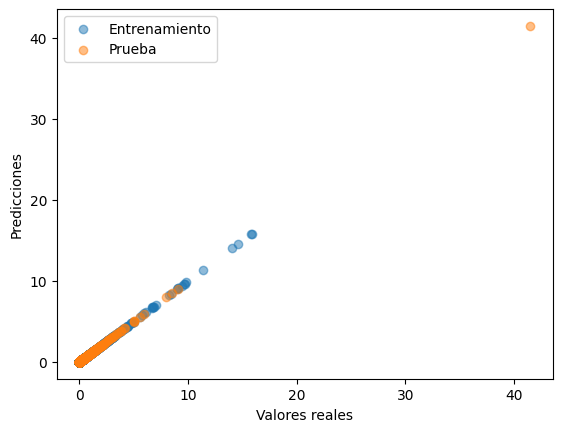

In [78]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# Calcular métricas de evaluación en ambos conjuntos
train_mse = mean_squared_error(y_train, y_train_pred)
test_mse = mean_squared_error(y_test, y_test_pred)

train_mae = mean_absolute_error(y_train, y_train_pred)
test_mae = mean_absolute_error(y_test, y_test_pred)

train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)

print("MSE en entrenamiento:", train_mse)
print("MSE en prueba:", test_mse)

print("MAE en entrenamiento:", train_mae)
print("MAE en prueba:", test_mae)

print("R^2 en entrenamiento:", train_r2)
print("R^2 en prueba:", test_r2)

plt.scatter(y_train, y_train_pred, label="Entrenamiento", alpha=0.5)
plt.scatter(y_test, y_test_pred, label="Prueba", alpha=0.5)
plt.xlabel("Valores reales")
plt.ylabel("Predicciones")
plt.legend()
plt.show()


##**Conclusiones:**

##**Análisis de las variables y del modelo:**
* MAE (Error Absoluto Medio): Un MAE de 0.0039 indica que, en promedio, las predicciones tienen un error absoluto medio de aproximadamente 0.0039 unidades. Esto sugiere que las predicciones son muy precisas y están muy cerca de los valores reales.

* MSE (Error Cuadrático Medio): El MSE es extremadamente bajo, con un valor de 3.8564e-05. Esto significa que el error cuadrado promedio entre las predicciones y los valores reales es extremadamente pequeño, lo que indica un ajuste muy cercano del modelo a los datos.

* RMSE (Error Cuadrático Medio de la Raíz): El RMSE también es muy bajo, con un valor de 0.0062. Esto sugiere que la dispersión absoluta de los errores es muy pequeña en comparación con la escala de la variable objetivo.

* R^2 (Coeficiente de Determinación): El R^2 es muy alto, con un valor de 0.99999. Esto indica que el modelo explica casi la totalidad de la varianza en los datos, lo que sugiere un ajuste excepcionalmente bueno del modelo a los datos.

En resumen, las métricas sugieren que el modelo actual es altamente preciso y se ajusta bien a los datos. El hecho de tener valores bajos de MAE, MSE y RMSE, junto con un R^2 cercano a 1, indica que el modelo tiene un buen rendimiento en la predicción de los valores de salida. Sin embargo, es importante tener en cuenta que un ajuste excesivamente preciso puede ser una señal de overfitting, lo que significa que el modelo puede estar capturando el ruido en los datos en lugar de patrones genuinos.